<h3>Python Program to find the best time of a day for buying and selling stocks. You are given minute wise time series data for two days. The best time for buying and selling should create the highest profit at the end of two days. </h3>

------------------------------------------------------------------------------------------------------------------------------------------------------------------------by Ritanshu Jayant

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_json('interview_dataset_1.json')


In [3]:
df.isna().sum()

datetime    0
open        0
high        0
low         0
close       0
volume      0
dtype: int64

In [4]:
df.head()

,datetime,open,high,low,close,volume
0,2021-02-04 09:15:00+05:30,1307.00,1307.00,1298.80,1299.05,134
1,2021-02-04 09:16:00+05:30,1299.05,1301.00,1299.05,1300.95,284
2,2021-02-04 09:17:00+05:30,1300.95,1301.00,1298.80,1298.80,188
3,2021-02-04 09:18:00+05:30,1298.80,1298.80,1287.00,1287.00,321
4,2021-02-04 09:19:00+05:30,1287.00,1294.45,1287.00,1290.70,48


In [5]:
#segregation of Date, Hour and Minute from the column 'datetime'.
df['date']=df['datetime'].dt.day
df['hour']=df['datetime'].dt.hour
df['min']=df['datetime'].dt.minute

In [6]:
#segregating the data set on the basis of dates.
Date4=df[df['date']==4]
Date5=df[df['date']==5]

In [7]:
#segregating the data set on the basis of hour of the day for both the dates.
Date4_9=Date4[Date4["hour"]==9]
Date4_10=Date4[Date4["hour"]==10]
Date4_11=Date4[Date4["hour"]==11]
Date4_12=Date4[Date4["hour"]==12]
Date4_13=Date4[Date4["hour"]==13]
Date4_14=Date4[Date4["hour"]==14]
Date4_15=Date4[Date4["hour"]==15]

Date5_9=Date5[Date5["hour"]==9]
Date5_10=Date5[Date5["hour"]==10]
Date5_11=Date5[Date5["hour"]==11]
Date5_12=Date5[Date5["hour"]==12]
Date5_13=Date5[Date5["hour"]==13]
Date5_14=Date5[Date5["hour"]==14]
Date5_15=Date5[Date5["hour"]==15]

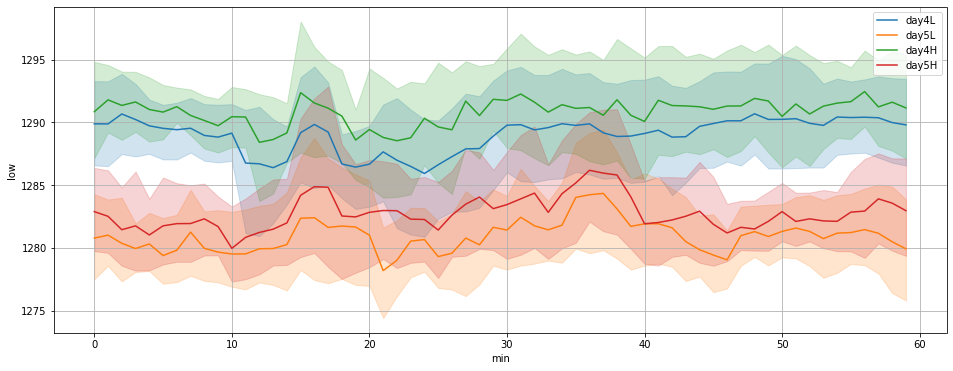

In [8]:
#checking mean beaviour of market for different minutes of hour.  
#ploting average low and high for hour. 
plt.figure(figsize=(16, 6))
sns.lineplot(x="min", y="low", data=Date4,label="day4L")
sns.lineplot(x="min", y="low", data=Date5,label="day5L")
sns.lineplot(x="min", y="high", data=Date4,label="day4H")
sns.lineplot(x="min", y="high", data=Date5,label="day5H")
plt.grid()

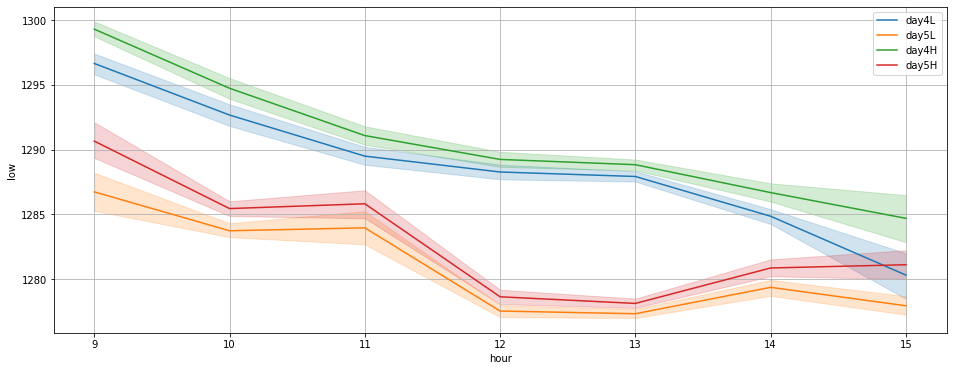

In [9]:
#checking mean beaviour of market for different hours of day.  
#ploting average low and high for day.
plt.figure(figsize=(16, 6))
sns.lineplot(x="hour", y="low", data=Date4,label="day4L")
sns.lineplot(x="hour", y="low", data=Date5,label="day5L")
sns.lineplot(x="hour", y="high", data=Date4,label="day4H")
sns.lineplot(x="hour", y="high", data=Date5,label="day5H")
plt.grid()

# Intraday

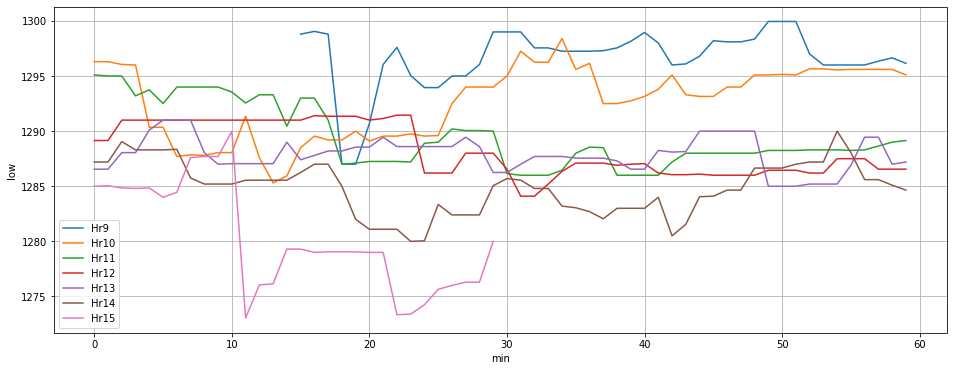

In [10]:
#ploting hourly lows for date-4th. 
plt.figure(figsize=(16, 6))
sns.lineplot(x="min", y="low", data=Date4_9,label="Hr9")
sns.lineplot(x="min", y="low", data=Date4_10,label="Hr10")
sns.lineplot(x="min", y="low", data=Date4_11,label="Hr11")
sns.lineplot(x="min", y="low", data=Date4_12,label="Hr12")
sns.lineplot(x="min", y="low", data=Date4_13,label="Hr13")
sns.lineplot(x="min", y="low", data=Date4_14,label="Hr14")
sns.lineplot(x="min", y="low", data=Date4_15,label="Hr15")
plt.grid()

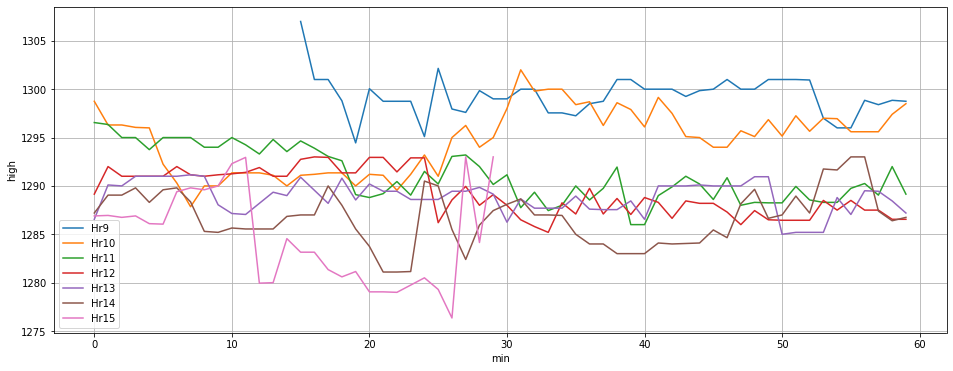

In [11]:
#ploting hourly highs for date-4th. 
plt.figure(figsize=(16, 6))
sns.lineplot(x="min", y="high", data=Date4_9,label="Hr9")
sns.lineplot(x="min", y="high", data=Date4_10,label="Hr10")
sns.lineplot(x="min", y="high", data=Date4_11,label="Hr11")
sns.lineplot(x="min", y="high", data=Date4_12,label="Hr12")
sns.lineplot(x="min", y="high", data=Date4_13,label="Hr13")
sns.lineplot(x="min", y="high", data=Date4_14,label="Hr14")
sns.lineplot(x="min", y="high", data=Date4_15,label="Hr15")
plt.grid()

We can see through the graphs that highest and lowest price of the day is in first hour of the day i.e. between 9am to 10am. So for maximum profit trading has to be done in this hour for <b>Intraday Trading</b>.

In [12]:
#finding the minute for the lowest price.  
lowest_min_Date4=Date4_9[Date4_9['low']==Date4_9['low'].min()]
lowest_min_Date4

,datetime,open,high,low,close,volume,date,hour,min
3,2021-02-04 09:18:00+05:30,1298.8,1298.80,1287.0,1287.0,321,4,9,18
4,2021-02-04 09:19:00+05:30,1287.0,1294.45,1287.0,1290.7,48,4,9,19


In [13]:
L4=lowest_min_Date4['min'].min()

In [14]:
#finding the minute for the highest price.  
highest_min_Date4=Date4_9[Date4_9['min']>L4]
highest_min_Date4[highest_min_Date4['high']==highest_min_Date4['high'].max()]

,datetime,open,high,low,close,volume,date,hour,min
10,2021-02-04 09:25:00+05:30,1293.95,1302.15,1293.95,1297.95,463,4,9,25


On feb 4 if the shares bought at <b>9:18am</b> with price <b>1287.0</b> and sold at <b>9:25am</b> at price <b>1302.15</b> then it would give the maximun profit of <b>15.15</b>unit/share.<b>(Intraday Trading)</b>

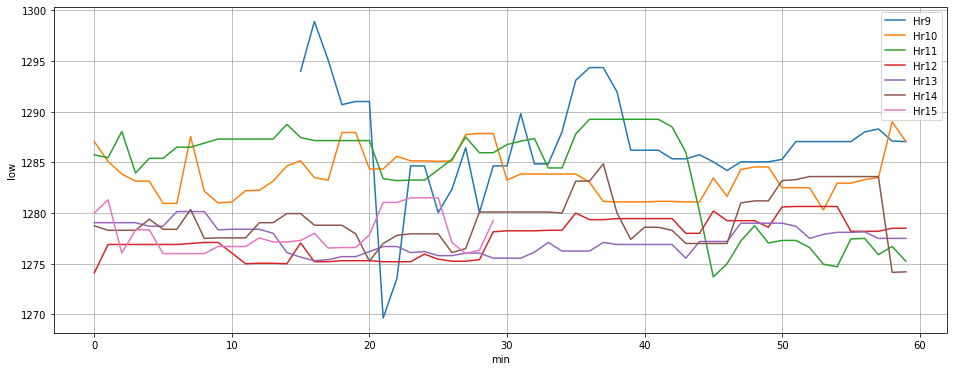

In [15]:
#ploting hourly lows for date-5th. 
plt.figure(figsize=(16, 6))
sns.lineplot(x="min", y="low", data=Date5_9,label="Hr9")
sns.lineplot(x="min", y="low", data=Date5_10,label="Hr10")
sns.lineplot(x="min", y="low", data=Date5_11,label="Hr11")
sns.lineplot(x="min", y="low", data=Date5_12,label="Hr12")
sns.lineplot(x="min", y="low", data=Date5_13,label="Hr13")
sns.lineplot(x="min", y="low", data=Date5_14,label="Hr14")
sns.lineplot(x="min", y="low", data=Date5_15,label="Hr15")
plt.grid()

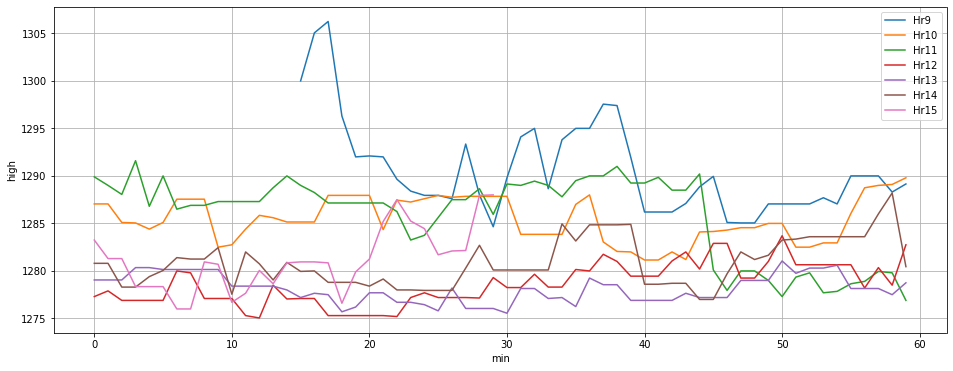

In [16]:
#ploting hourly highs for date-4th. 
plt.figure(figsize=(16, 6))
sns.lineplot(x="min", y="high", data=Date5_9,label="Hr9")
sns.lineplot(x="min", y="high", data=Date5_10,label="Hr10")
sns.lineplot(x="min", y="high", data=Date5_11,label="Hr11")
sns.lineplot(x="min", y="high", data=Date5_12,label="Hr12")
sns.lineplot(x="min", y="high", data=Date5_13,label="Hr13")
sns.lineplot(x="min", y="high", data=Date5_14,label="Hr14")
sns.lineplot(x="min", y="high", data=Date5_15,label="Hr15")
plt.grid()

We can see through the graphs that highest and lowest price of the day is in first hour of the day i.e. between 9am to 10am. So for maximum profit trading has to be done in this hour under <b>Intraday Trading</b>.

In [17]:
#finding the minute for the lowest price.  
lowest_min_Date5=Date5_9[Date5_9['low']==Date5_9['low'].min()]
lowest_min_Date5

,datetime,open,high,low,close,volume,date,hour,min
379,2021-02-05 09:21:00+05:30,1292.0,1292.0,1269.65,1280.9,1095,5,9,21


In [18]:
L5=lowest_min_Date5['min'].min()

In [19]:
#finding the minute for the highest price. 
highest_min_Date5=Date5_9[Date5_9['min']>L5]
highest_min_Date5[highest_min_Date5['high']==highest_min_Date5['high'].max()]

,datetime,open,high,low,close,volume,date,hour,min
395,2021-02-05 09:37:00+05:30,1295.0,1297.55,1294.35,1297.4,245,5,9,37


On feb 5 if the shares bought at <b>9:21am</b> at price <b>1269.65</b> and sold at <b>9:37am</b> at price <b>1297.55</b>. Then it would have given the maximun profit of <b>27.9</b>unit/share in <b>Intraday Trading.</b>

# Cash N Carry 

In [20]:
#finding the time for the lowest price for Date-4th. 

Date4[Date4['low']==Date4['low'].min()]

,datetime,open,high,low,close,volume,date,hour,min
354,2021-02-04 15:11:00+05:30,1292.95,1292.95,1273.05,1276.05,1522,4,15,11


In [21]:
#finding the time for the highest price for Date-5th. 
Date5[Date5['high']==Date5['high'].max()]

,datetime,open,high,low,close,volume,date,hour,min
375,2021-02-05 09:17:00+05:30,1304.05,1306.25,1295.1,1296.55,990,5,9,17


And for the maximum profit if trading was done under <b>CNC</b>(Cash and Carry) then share has to be bought on <b>feb 4</b> at <b>3:11pm</b> at price <b>1273.05</b>. And should be sold on <b>feb 5</b> at <b>9:17am</b> at price <b>1306.25</b>. Then it would have given the maximun profit of <b>33.2</b>points/share.